# NBA MVP Prediction

## Table of Contents
* [Import data/modules](#import-data)
* [Exploratory Data Analysis](#eda)
* [Preprocessing](#preprocessing)
* [Modeling](#modeling)
* [Forecasting 2022 MVP](#forecasting)

## Import data/modules <a class="anchor" id="import-data"></a>


In [ ]:
!pip install dataframe_image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 12.8 MB/s eta 0:00:00


In [ ]:
#essentials
import os
import numpy as np
import pandas as pd
import dataframe_image as dfi
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#tools/metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
import shap

#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#pandas show all columns
pd.set_option('display.max_columns', None)

#%load_ext autoreload
#%autoreload 2
#%run ./__init__

### Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving master_table.csv to master_table (1).csv


In [ ]:
data_path = 'master_table.csv'
master_table = pd.read_csv(data_path)

In [ ]:
master_table.head()

Rank               Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
0    1  Kareem Abdul-Jabbar   32  LAL  147.0    147.0      221  0.665  82   
1    2        Julius Erving   29  PHI   31.5     31.5      221  0.143  78   
2    3        George Gervin   27  SAS   19.0     19.0      221  0.086  78   
3    4           Larry Bird   23  BOS   15.0     15.0      221  0.068  82   
4   5T       Tiny Archibald   31  BOS    2.0      2.0      221  0.009  80   

     MP   PTS   TRB  AST  STL  BLK    FG%    3P%    FT%    WS  WS/48  year  \
0  38.3  24.8  10.8  4.5  1.0  3.4  0.604  0.000  0.765  14.8  0.227  1980   
1  36.1  26.9   7.4  4.6  2.2  1.8  0.519  0.200  0.787  12.5  0.213  1980   
2  37.6  33.1   5.2  2.6  1.4  1.0  0.528  0.314  0.852  10.6  0.173  1980   
3  36.0  21.3  10.4  4.5  1.7  0.6  0.474  0.406  0.836  11.2  0.182  1980   
4  35.8  14.1   2.5  8.4  1.3  0.1  0.482  0.222  0.830   8.9  0.148  1980   

                 team     W   W/L%  seed  player_efficiency_rating  \
0  Los Angeles Lakers  60.0  0.732   1.0                      25.3   
1  Philadelphia 76ers  59.0  0.720   2.0                      25.4   
2   San Antonio Spurs  41.0  0.500   4.5                      24.0   
3      Boston Celtics  61.0  0.744   1.0                      20.5   
4      Boston Celtics  61.0  0.744   1.0                      15.3   

   true_shooting_percentage  three_point_attempt_rate  \
0                     0.639                     0.001   
1                     0.568                     0.012   
2                     0.587                     0.053   
3                     0.538                     0.098   
4                     0.574                     0.023   

   free_throw_attempt_rate  offensive_rebound_percentage  \
0                    0.344                           7.2   
1                    0.331                           8.6   
2                    0.306                           5.7   
3                    0.246                           8.3   
4                    0.548                           2.3   

   defensive_rebound_percentage  total_rebound_percentage  assist_percentage  \
0                          22.2                      15.4               16.5   
1                          12.9                      10.9               21.4   
2                           8.9                       7.3               11.0   
3                          23.6                      16.0               18.5   
4                           5.3                       3.8               30.2   

   steal_percentage  block_percentage  turnover_percentage  usage_percentage  \
0               1.2               4.6                 15.7              24.1   
1               2.8               2.7                 13.3              30.3   
2               1.6               1.4                 10.3              31.7   
3               2.3               1.0                 14.0              25.3   
4               1.7               0.2                 19.7              17.0   

   offensive_win_shares  defensive_win_shares  win_shares  \
0                   9.5                   5.3        14.8   
1                   7.3                   5.2        12.5   
2                   9.3                   1.3        10.6   
3                   5.6                   5.6        11.2   
4                   5.9                   2.9         8.9   

   win_shares_per_48_minutes  offensive_box_plus_minus  \
0                      0.227                       4.8   
1                      0.213                       5.7   
2                      0.173                       5.5   
3                      0.182                       3.0   
4                      0.148                       1.4   

   defensive_box_plus_minus  box_plus_minus  value_over_replacement_player  
0                       2.4             7.2                            7.3  
1                       1.9             7.6                            6.8  
2                      -1.6         

## Exploratory Data Analysis <a class="anchor" id="eda"></a>


In [ ]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           679 non-null    object 
 1   Player                         679 non-null    object 
 2   Age                            679 non-null    int64  
 3   Tm                             679 non-null    object 
 4   First                          679 non-null    float64
 5   Pts Won                        679 non-null    float64
 6   Pts Max                        679 non-null    int64  
 7   Share                          679 non-null    float64
 8   G                              679 non-null    int64  
 9   MP                             679 non-null    float64
 10  PTS                            679 non-null    float64
 11  TRB                            679 non-null    float64
 12  AST                            679 non-null    flo

### Correlation Matrix

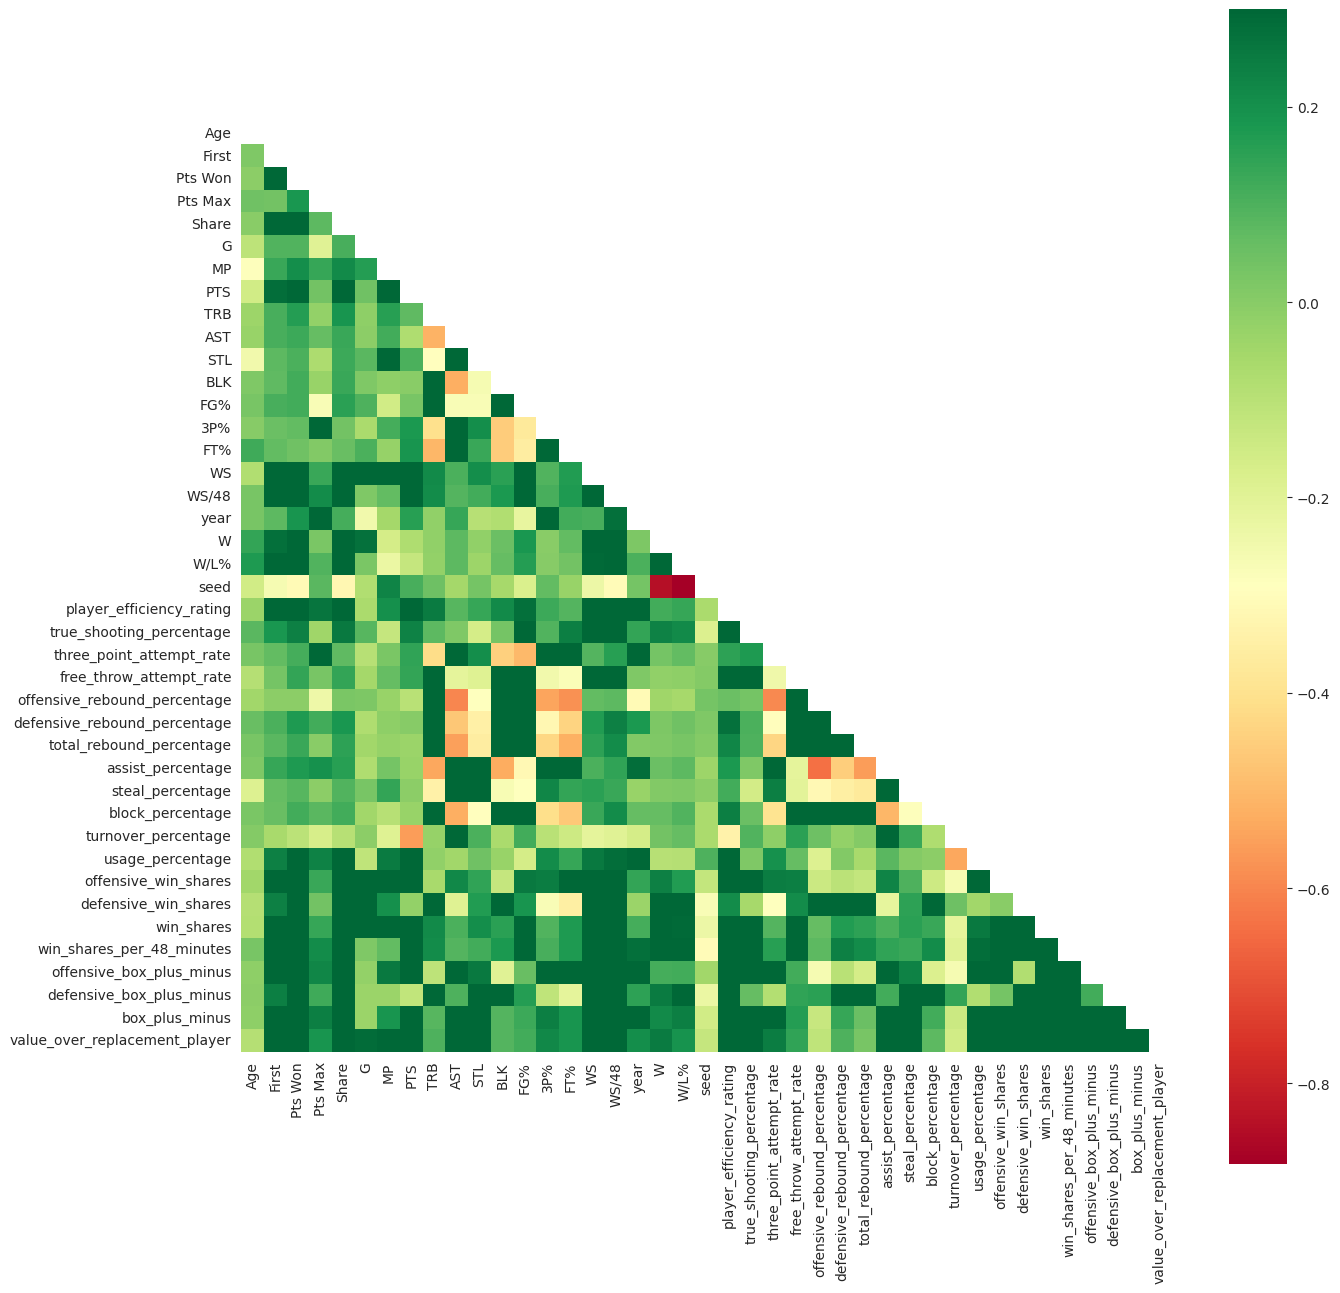

In [ ]:
#correlations of each features
corr_matrix = master_table.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")


### Mutual Information

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a logarithmic quantity, so it increases very slowly.)

* MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
* It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features. It is a univariate metric.
* The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.



In [ ]:
def calculate_ml_scores(df):
    X = df.copy()
    y = X["Share"]

    X.drop('Share', axis=1, inplace=True)

    # Label encoding for categoricals
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X.dtypes == int
    
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return X, y, mi_scores

In [ ]:
#drop columns for mutual information
to_drop_mi = ['Rank','Player','Age','year','Tm','team','First','Pts Won','Pts Max','WS','WS/48']
master_table_mi = master_table.copy()
master_table_mi.drop(to_drop_mi, axis=1, inplace=True)

In [ ]:
X, y, mi_scores = calculate_ml_scores(df=master_table_mi)

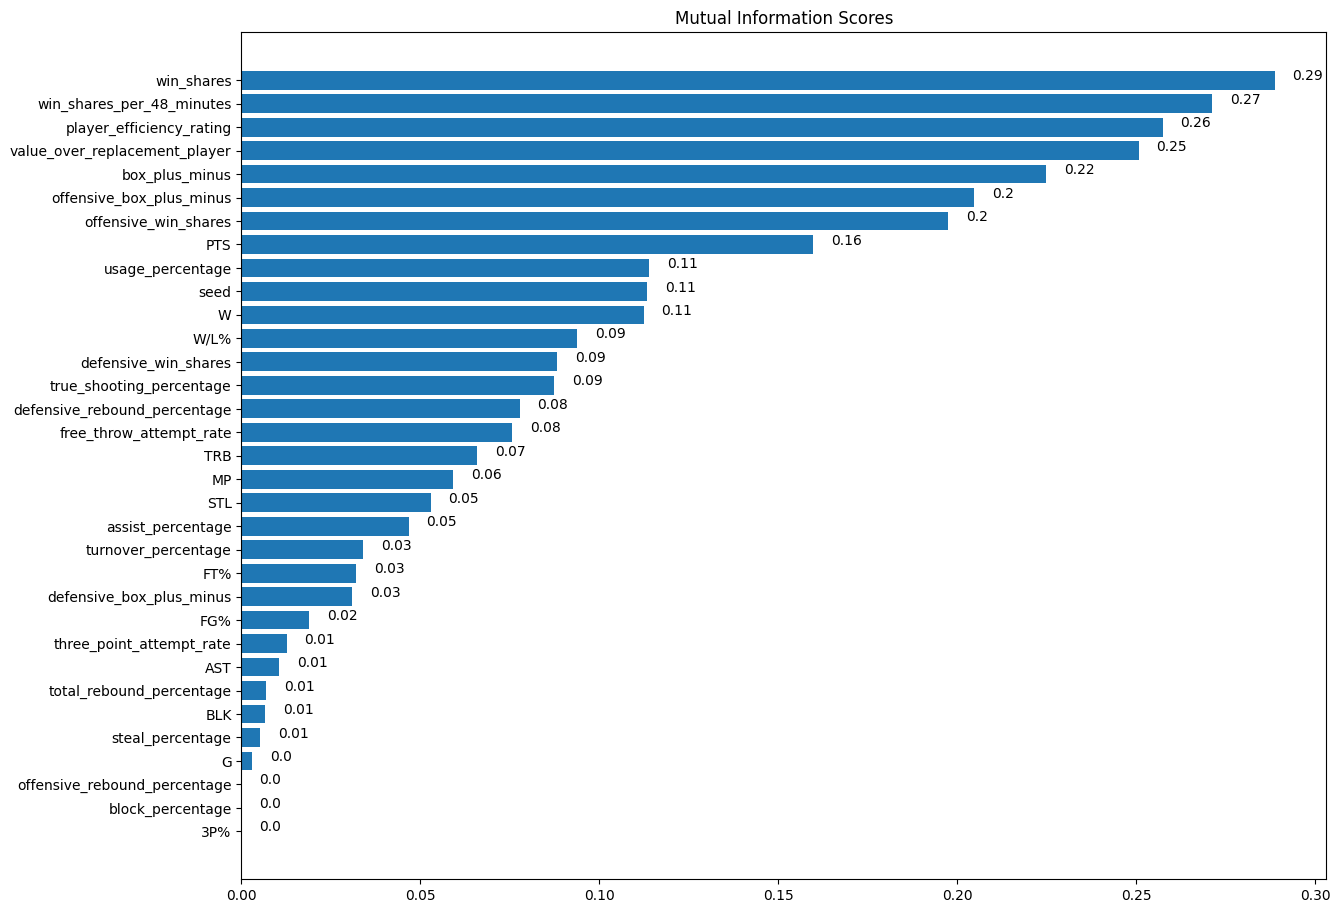

In [ ]:
def plot_mi_scores(scores, figsize):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(width, scores)
    
    for index, value in enumerate(scores):
        plt.text(value +0.005 , index, str(round(value,2)))
    
    plt.yticks(width, ticks)    
    plt.title("Mutual Information Scores")

plot_mi_scores(mi_scores, figsize=(14,11))

### Visualize significant features vs. MVP Shares

In [ ]:
def add_win_lose_col(df):
    rank_lst = []
    for i in list(df['Rank']):
        if i == '1':
            rank_lst.append('won')
        else:
            rank_lst.append('lost')
    master_table_rank = df.copy()
    master_table_rank['Win/Lose'] = rank_lst
    return master_table_rank

In [ ]:
def show_feature_vs_share(feature, df):
    fig = px.scatter(data_frame = df,
               x=feature,
               y='Share',
               color='Win/Lose',
               color_discrete_sequence=['blue','gray'], 
               hover_data={
                   'Win/Lose': False,
                   'Player': True, 
                   'year': True,
                   'seed': True,
                   'W/L%': True, 
                   'W': True
                   
               })
    fig.update_layout(height=500,
                     title = f"{feature} vs. MVP share")
    fig.show()

In [ ]:
features = ['win_shares', 
            'player_efficiency_rating',
            'value_over_replacement_player',
            'box_plus_minus',
            'offensive_box_plus_minus',
            'usage_percentage',
            'seed',
            'W',
            'W/L%',
            'PTS']

master_table_rank = add_win_lose_col(df=master_table)

for feature in features:
    show_feature_vs_share(feature=feature, df=master_table_rank)

At this point these variables may seem to have somewhat linear relationship with the MVP share metric. It could be valid to consider them as model features as the experiments are conducted.

# Preprocessing <a class="anchor" id="preprocessing"></a>

drop unnecessary or redundant features

In [ ]:
#drop columns 

to_drop = [
    'Rank',
    'Player',
    'Age',
    'year',
    'Tm',
    'team',
    'First',
    'Pts Won',
    'Pts Max',
    'WS/48',
    'WS',
    'MP',
    'G',
    'W', 
    'FG%',
    '3P%',
    'STL', 
    'BLK',
    'three_point_attempt_rate',
    'total_rebound_percentage',
    'offensive_rebound_percentage',
    'block_percentage',
    'defensive_rebound_percentage',
    'steal_percentage',
    'turnover_percentage',
    'assist_percentage',
    'AST',
    'TRB',
    'free_throw_attempt_rate', 
    'FT%',
    'win_shares', 
    'box_plus_minus', 
    'defensive_box_plus_minus',
    'offensive_win_shares', 
    'defensive_win_shares', 
    'true_shooting_percentage',
    #'value_over_replacement_player',
    #'offensive_box_plus_minus'
]

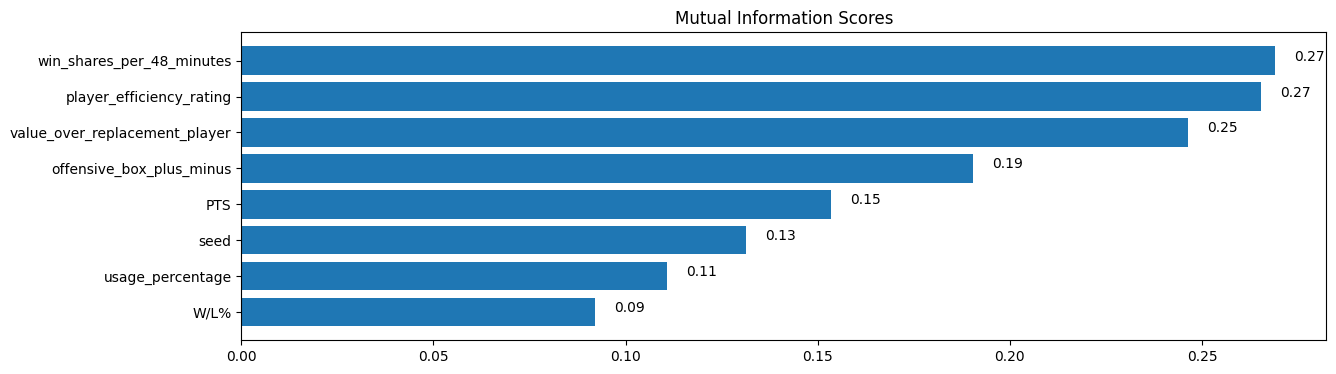

In [ ]:
#run another Mutual Information Score analysis
master_table_mi2 = master_table.copy()
master_table_mi2.drop(to_drop, axis=1, inplace=True)
X, y, mi_scores2 = calculate_ml_scores(df=master_table_mi2)
plot_mi_scores(mi_scores2, figsize=(14,4))

## Modeling <a class="anchor" id="modeling"></a>

### Train/Test Split

test on selected year, train on all other years that weren't selected

In [ ]:
def train_test_split_by_year(year, df, scaling=False):
    #test year = selected year, train year = other years outside of selected year
    train_df = df[df['year'] != year]
    test_df = df[df['year'] == year]
    
    train_df2 = train_df.copy()
    test_df2 = test_df.copy()
    
    train_df2.drop(to_drop, axis=1, inplace=True)
    test_df2.drop(to_drop, axis=1, inplace=True)
    
    if scaling == True:
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        train_df2 = sc_X.fit_transform(train_df2)
        test_df2 = sc_y.fit_transform(test_df2)
    
    X_train = train_df2.copy()
    y_train = X_train["Share"]
    
    X_test = test_df2.copy()
    y_test = X_test["Share"]

    X_train.drop('Share', axis=1, inplace=True)
    cols = X_train.columns
    X_test.drop('Share', axis=1, inplace=True)

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test, cols

### Model Helper Functions

train, predict, calculate MAE & R squared, show actual vs. predicted in a dataframe

In [ ]:
def run_model(regressor, X_train, y_train, X_test, y_test, df, year):
    model = regressor
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test)
    mae = mean_absolute_error(predictions, y_test)
    r2 = r2_score(y_test, predictions)
    
    mvp_race = df[df['year'] == year]
    mvp_race['predicted_share'] = predictions
    mvp_race = mvp_race.sort_values(["Share", "predicted_share"], ascending = (False, False))
                                    
    actual_winner = mvp_race[mvp_race['Share'] == mvp_race['Share'].max()]['Player']
    predicted_winner = mvp_race[mvp_race['predicted_share'] == mvp_race['predicted_share'].max()]['Player']
    return model, mae, r2, predicted_winner.iloc[0], actual_winner.iloc[0], mvp_race

find average metrics and overall accuracy

In [ ]:
years = [year for year in range(1980, 2022)]

def run_model_average(df, regressor, scaling=False, print_metrics=False):
    mae_lst = []
    r2_lst = []
    predicted_lst = []
    actual_lst = []
    label_lst =[]
    model_lst = []
    for year in tqdm(years):
        X_train, y_train, X_test, y_test, cols = train_test_split_by_year(year=year, df=df, scaling=False)
        model, mae, r2, predicted_winner, actual_winner, mvp_race = run_model(regressor,
                                                             X_train,
                                                              y_train,
                                                              X_test,
                                                              y_test,
                                                              df=df,
                                                              year=year,
                                                            )
        if predicted_winner == actual_winner:
            label = 'correct'
        else:
            label = 'incorrect'
        mae_lst.append(mae)
        r2_lst.append(r2)
        predicted_lst.append(predicted_winner)
        actual_lst.append(actual_winner)
        label_lst.append(label)
        model_lst.append(model)
    d = {
    'year': years,
    'MAE': mae_lst,
    'R squared': r2_lst,
    'Predicted MVP': predicted_lst,
    'Actual MVP': actual_lst,
    'Label': label_lst
    }

    summary = pd.DataFrame(d)
    correct_count = summary['Label'].value_counts().iloc[0]
    incorrect_count = summary['Label'].value_counts().iloc[1]
    accuracy = correct_count / (correct_count + incorrect_count)
    avg_mae = summary['MAE'].mean()
    avg_r2  = summary['R squared'].mean()
    
    if print_metrics == True:
        print(f"Average MAE: {avg_mae}")
        print(f"Average R squared: {avg_r2}")
        print(f"Prediction accuracy: {accuracy}")
    return avg_mae, avg_r2, accuracy, summary, model_lst, cols

### Models
* Linear Regression
* Random Forest Regressor
* XGBoost Regressor
* LightGBM Regressor

(see parameter_tuning.ipynb for parameter tuning scripts)

#### Linear Regression

In [ ]:
lr_avg_mae, lr_avg_r2, lr_accuracy, lr_summary, lr_models, cols = run_model_average(df=master_table,
                  regressor = LinearRegression(),
                 scaling=True,
                print_metrics=True)

100%|██████████| 42/42 [00:00<00:00, 85.84it/s]

Average MAE: 0.14509075331966953
Average R squared: 0.47289062724146824
Prediction accuracy: 0.6428571428571429


#### Random Forest Regressor

In [ ]:
#display feature importance for tree algorithms (RF, XGB, LGBM
def avg_feature_importance(models, cols):
    lst = []
    for model in models:
        feature_importance = list(model.feature_importances_)
        lst.append(feature_importance)
        
    df = pd.DataFrame(lst, columns=cols)
    mean_features = df.mean()
    
    #df2 = pd.DataFrame([cols ,mean_features], columns=['Feature', 'Feature Importance'])
    df2 = pd.DataFrame([cols ,mean_features]).T
    df2 = df2.rename(columns={0:'Feature', 1:'Score'}).sort_values(by='Score', ascending=False)
    
    #plt.rcParams["figure.figsize"] = (7,4)
    plt.title('Feature Importance Score')
    sns.barplot(x='Score',
                y= 'Feature',
               data=df2,
                  )
    plt.show()

In [ ]:
rf_avg_mae, rf_avg_r2, rf_accuracy, rf_summary, rf_models, rf_cols = run_model_average(df=master_table,
                  regressor=RandomForestRegressor(n_estimators = 23, 
                                                  random_state = 0, 
                                                  max_depth=7, 
                                                  min_samples_leaf=1,
                                                  min_samples_split=2),
                print_metrics=True)

100%|██████████| 42/42 [00:04<00:00, 10.32it/s]

Average MAE: 0.1055555928166581
Average R squared: 0.5970807281614889
Prediction accuracy: 0.6904761904761905


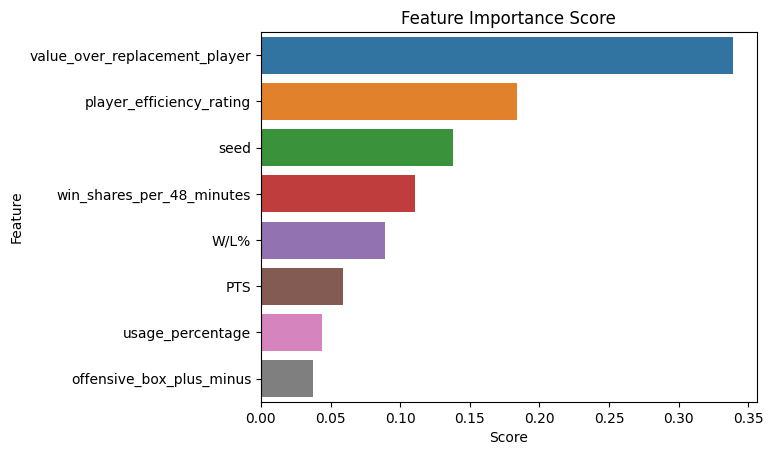

In [ ]:
avg_feature_importance(models=rf_models, cols=rf_cols)

#### XGBoost

In [ ]:
#BEST MODEL
# 16 5, 0.2745

xgb_avg_mae, xgb_avg_r2, xgb_accuracy, xgb_summary, xgb_models, xgb_cols = run_model_average(df=master_table,
                  regressor = XGBRegressor(n_estimators=16, max_depth=5, learning_rate = 0.2745, subsample=1, colsample_bytree=1),
                 scaling=False, print_metrics=True)

100%|██████████| 42/42 [00:01<00:00, 25.17it/s]

Average MAE: 0.1059364815079127
Average R squared: 0.5851412457038128
Prediction accuracy: 0.7619047619047619


In [ ]:
xgb_summary

year       MAE  R squared          Predicted MVP             Actual MVP  \
0   1980  0.075293   0.609939    Kareem Abdul-Jabbar    Kareem Abdul-Jabbar   
1   1981  0.062669   0.397841          Julius Erving          Julius Erving   
2   1982  0.083492   0.189128          Julius Erving           Moses Malone   
3   1983  0.096203   0.150071          Julius Erving           Moses Malone   
4   1984  0.092779   0.580405             Larry Bird             Larry Bird   
5   1985  0.047983   0.854645             Larry Bird             Larry Bird   
6   1986  0.089285   0.687538             Larry Bird             Larry Bird   
7   1987  0.069368   0.725705          Magic Johnson          Magic Johnson   
8   1988  0.084360   0.697402         Michael Jordan         Michael Jordan   
9   1989  0.061476   0.849236          Magic Johnson          Magic Johnson   
10  1990  0.113709   0.697301          Magic Johnson          Magic Johnson   
11  1991  0.056694   0.872050         Michael Jordan         Michael Jordan   
12  1992  0.060115   0.860151         Michael Jordan         Michael Jordan   
13  1993  0.119165   0.688625         Michael Jordan        Charles Barkley   
14  1994  0.091656   0.548152         David Robinson        Hakeem Olajuwon   
15  1995  0.087247   0.752403         David Robinson         David Robinson   
16  1996  0.078453   0.770558         Michael Jordan         Michael Jordan   
17  1997  0.058290   0.887668         Michael Jordan            Karl Malone   
18  1998  0.065135   0.811325         Michael Jordan         Michael Jordan   
19  1999  0.110206   0.177930            Karl Malone            Karl Malone   
20  2000  0.076546   0.799908       Shaquille O'Neal       Shaquille O'Neal   
21  2001  0.122042   0.506721       Shaquille O'Neal          Allen Iverson   
22  2002  0.158186   0.196817             Tim Duncan             Tim Duncan   
23  2003  0.135695   0.492553             Tim Duncan             Tim Duncan   
24  2004  0.101296   0.624515          Kevin Garnett          Kevin Garnett   
25  2005  0.194645  -0.259103      Amar'e Stoudemire             Steve Nash   
26  2006  0.195438  -0.010666            Kobe Bryant             Steve Nash   
27  2007  0.115813   0.539410          Dirk Nowitzki          Dirk Nowitzki   
28  2008  0.111240   0.643209           LeBron James            Kobe Bryant   
29  2009  0.122807   0.619907           LeBron James           LeBron James   
30  2010  0.133178   0.541050           LeBron James           LeBron James   
31  2011  0.122934   0.609682           Derrick Rose           Derrick Rose   
32  2012  0.146672   0.423303           LeBron James           LeBron James   
33  2013  0.088791   0.783367           LeBron James           LeBron James   
34  2014  0.081699   0.751383           Kevin Durant           Kevin Durant   
35  2015  0.090008   0.826297          Stephen Curry          Stephen Curry   
36  2016  0.120429   0.713205          Stephen Curry          Stephen Curry   
37  2017  0.278213  -0.086833           Kevin Durant      Russell Westbrook   
38  2018  0.107558   0.783634           James Harden           James Harden   
39  2019  0.118440   0.770890  Giannis Antetokounmpo  Giannis Antetokounmpo   
40  2020  0.106030   0.800939  Giannis Antetokounmpo  Giannis Antetokounmpo   
41  2021  0.118096   0.697671           Nikola Jokić           Nikola Jokić   

        Label  
0     correct  
1     correct  
2   incorrect  
3   incorrect  
4     correct  
5     correct  
6     correct  
7     correct  
8     correct  
9     correct  
10    correct  
11    correct  
12    correct  
13  incorrect  
14  incorrect  
15    correct  
16    correct  
17  incorrect  
18    correct  
19    correct  
20    correct  
21  incorrect  
22    correct  
23    correct  
24    correct  
25  incorrect  
26  incorrect  
27    correct  
28  incorrect  
29    correct  
30    correct  
31    correct  
32    correct  
33    correct  
34    correct  
35    correct  
36    correct 

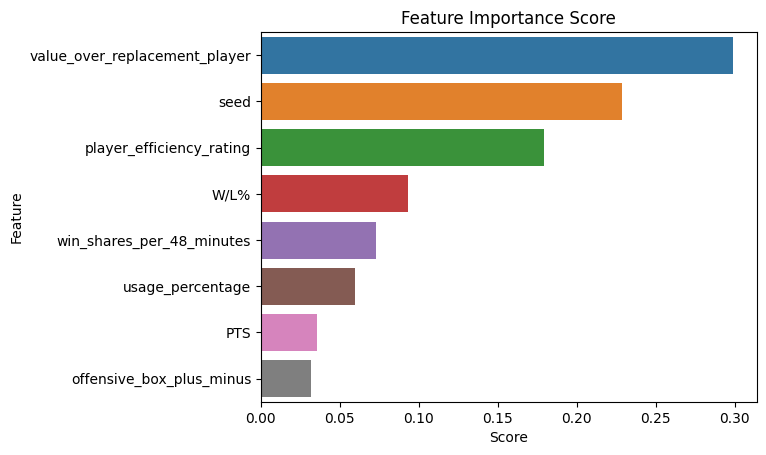

In [ ]:
avg_feature_importance(models=xgb_models, cols=xgb_cols)

In [ ]:
xgb_summary

year       MAE  R squared          Predicted MVP             Actual MVP  \
0   1980  0.075293   0.609939    Kareem Abdul-Jabbar    Kareem Abdul-Jabbar   
1   1981  0.062669   0.397841          Julius Erving          Julius Erving   
2   1982  0.083492   0.189128          Julius Erving           Moses Malone   
3   1983  0.096203   0.150071          Julius Erving           Moses Malone   
4   1984  0.092779   0.580405             Larry Bird             Larry Bird   
5   1985  0.047983   0.854645             Larry Bird             Larry Bird   
6   1986  0.089285   0.687538             Larry Bird             Larry Bird   
7   1987  0.069368   0.725705          Magic Johnson          Magic Johnson   
8   1988  0.084360   0.697402         Michael Jordan         Michael Jordan   
9   1989  0.061476   0.849236          Magic Johnson          Magic Johnson   
10  1990  0.113709   0.697301          Magic Johnson          Magic Johnson   
11  1991  0.056694   0.872050         Michael Jordan         Michael Jordan   
12  1992  0.060115   0.860151         Michael Jordan         Michael Jordan   
13  1993  0.119165   0.688625         Michael Jordan        Charles Barkley   
14  1994  0.091656   0.548152         David Robinson        Hakeem Olajuwon   
15  1995  0.087247   0.752403         David Robinson         David Robinson   
16  1996  0.078453   0.770558         Michael Jordan         Michael Jordan   
17  1997  0.058290   0.887668         Michael Jordan            Karl Malone   
18  1998  0.065135   0.811325         Michael Jordan         Michael Jordan   
19  1999  0.110206   0.177930            Karl Malone            Karl Malone   
20  2000  0.076546   0.799908       Shaquille O'Neal       Shaquille O'Neal   
21  2001  0.122042   0.506721       Shaquille O'Neal          Allen Iverson   
22  2002  0.158186   0.196817             Tim Duncan             Tim Duncan   
23  2003  0.135695   0.492553             Tim Duncan             Tim Duncan   
24  2004  0.101296   0.624515          Kevin Garnett          Kevin Garnett   
25  2005  0.194645  -0.259103      Amar'e Stoudemire             Steve Nash   
26  2006  0.195438  -0.010666            Kobe Bryant             Steve Nash   
27  2007  0.115813   0.539410          Dirk Nowitzki          Dirk Nowitzki   
28  2008  0.111240   0.643209           LeBron James            Kobe Bryant   
29  2009  0.122807   0.619907           LeBron James           LeBron James   
30  2010  0.133178   0.541050           LeBron James           LeBron James   
31  2011  0.122934   0.609682           Derrick Rose           Derrick Rose   
32  2012  0.146672   0.423303           LeBron James           LeBron James   
33  2013  0.088791   0.783367           LeBron James           LeBron James   
34  2014  0.081699   0.751383           Kevin Durant           Kevin Durant   
35  2015  0.090008   0.826297          Stephen Curry          Stephen Curry   
36  2016  0.120429   0.713205          Stephen Curry          Stephen Curry   
37  2017  0.278213  -0.086833           Kevin Durant      Russell Westbrook   
38  2018  0.107558   0.783634           James Harden           James Harden   
39  2019  0.118440   0.770890  Giannis Antetokounmpo  Giannis Antetokounmpo   
40  2020  0.106030   0.800939  Giannis Antetokounmpo  Giannis Antetokounmpo   
41  2021  0.118096   0.697671           Nikola Jokić           Nikola Jokić   

        Label  
0     correct  
1     correct  
2   incorrect  
3   incorrect  
4     correct  
5     correct  
6     correct  
7     correct  
8     correct  
9     correct  
10    correct  
11    correct  
12    correct  
13  incorrect  
14  incorrect  
15    correct  
16    correct  
17  incorrect  
18    correct  
19    correct  
20    correct  
21  incorrect  
22    correct  
23    correct  
24    correct  
25  incorrect  
26  incorrect  
27    correct  
28  incorrect  
29    correct  
30    correct  
31    correct  
32    correct  
33    correct  
34    correct  
35    correct  
36    correct 

In [ ]:
pip install webdriver-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#export as image
from webdriver_manager.chrome import ChromeDriverManager
dfi.export(xgb_summary,'xgboost_summary.png')

OSError: ignored

#### LightGBM

In [ ]:
lgbm_avg_mae, lgbm_avg_r2, lgbm_accuracy, lgbm_summary, lgbm_models, lgbm_cols = run_model_average(df=master_table,
                  regressor = LGBMRegressor(n_estimators=23,
                                            max_depth=4,
                                            learning_rate=0.15,
                                            num_leaves=28,
                                            boosting_type='goss',
                                            random_state = 0,
                                           ),
                 scaling=False, print_metrics=True)


100%|██████████| 42/42 [00:00<00:00, 43.59it/s]

Average MAE: 0.106396685378651
Average R squared: 0.6076040959543143
Prediction accuracy: 0.7619047619047619


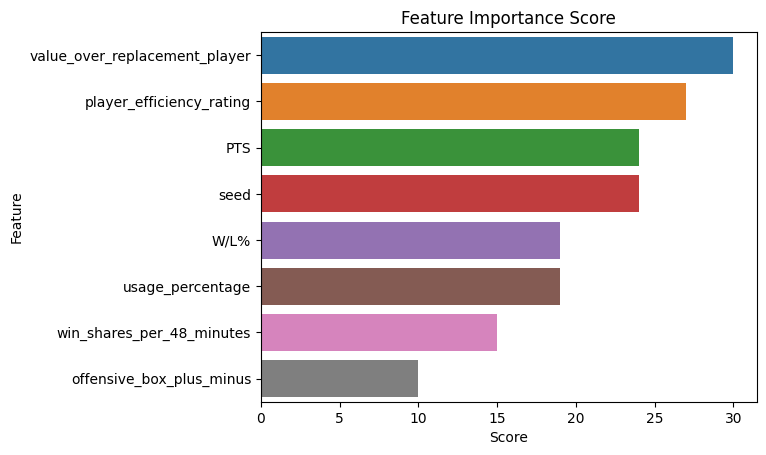

In [ ]:
avg_feature_importance(models=lgbm_models, cols=lgbm_cols)

#### Model Summaries

Best Models: 

In [ ]:
#all models in models list have same parameters
best_xgb_model = xgb_models[0]
best_rf_model = rf_models[0]
best_lgbm_model = lgbm_models[0]

### Validate specific year 

The following function can be used to check details on a specific year's MVP race along with its predictions from the model 
* see 'Share' for actual share from the specific year's MVP race
* see 'predicted_share' for model's predicted share

In [ ]:
def validate_year(year):
    X_train, y_train, X_test, y_test, cols = train_test_split_by_year(year, df=master_table, scaling=False)
    model, mae, r2, predicted_winner, actual_winner, mvp_race = run_model(best_xgb_model,
                                              X_train, y_train, X_test, y_test, df=master_table, year=year)
    # shift column 'Name' to first position
    nineth_column = mvp_race.pop('predicted_share')
    # first_column) function
    mvp_race.insert(8, 'predicted_share', nineth_column)
    mvp_race = mvp_race.reset_index(drop=True)

    X_test_df = pd.DataFrame(columns=cols, data = X_test)
    
    print(f'Predicted: {predicted_winner}')
    print(f'Actual: {actual_winner}')
    avg_feature_importance(models=[model], cols=cols)
    
    return model, X_test_df, mvp_race #mvp_race.style.highlight_max(subset = ['Share', 'predicted_share'], color = 'lightgreen', axis = 0)

In [ ]:
def visualize_shap_values(mvp_race, model):
    top_candidates = list(mvp_race.head(3)['Player'])

    for idx, player in enumerate(top_candidates):
        data_for_prediction = mvp_race[mvp_race['Player'] == player]
        data_for_prediction = data_for_prediction[list(xgb_cols)]
        data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
        rank = idx + 1
        print(f"Rank: {rank}: {player}")

        # Create object that can calculate shap values
        explainer = shap.TreeExplainer(model)
        # Calculate Shap values
        shap_values = explainer.shap_values(data_for_prediction_array)
        shap.initjs()
        display(shap.force_plot(explainer.expected_value, shap_values, data_for_prediction))

Predicted: Stephen Curry
Actual: Stephen Curry


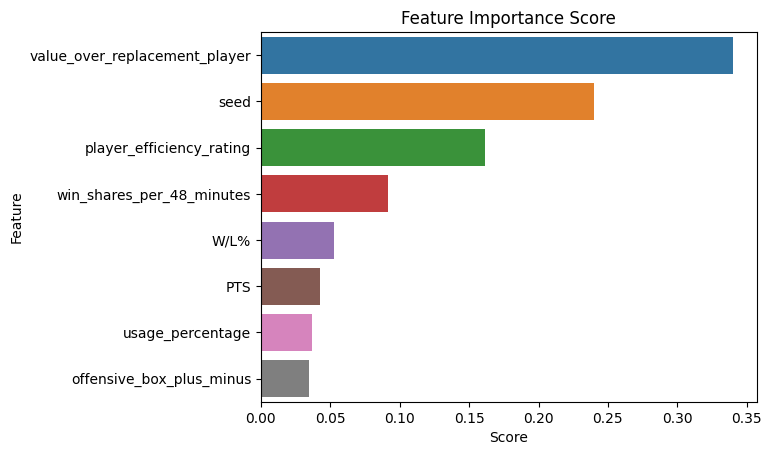

In [ ]:
model, X_test_df, mvp_race = validate_year(year=2016)

In [ ]:
visualize_shap_values(mvp_race, model)

Rank: 1: Stephen Curry


Rank: 2: Kawhi Leonard


Rank: 3: LeBron James


## Forecasting 2023 MVP <a class="anchor" id="forecasting"></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_2023.csv to data_2023 (1).csv


In [ ]:
#data to be forecasted: 2023 mvp candidates from NBA's MVP ladder
data_path_2023 = 'data_2023.csv'
data_2023 = pd.read_csv(data_path_2023)
data_2023_cleaned = data_2023.copy()
data_2023_cleaned = data_2023_cleaned[list(xgb_cols)]

In [ ]:
data_2023

Player  games_played                team   PTS  AST  STL  \
0  Giannis Antetokounmpo            63     milwaukee bucks  31.1  5.7  0.8   
1            Joel Embiid            66  philadelphia 76ers  33.1  4.2  1.0   
2           Nikola Jokic            69      denver nuggets  24.5  9.8  1.3   

   BLK    FG%    3P%   TRB   Tm   W   W/L%  seed  player_efficiency_rating  \
0  0.8  0.553  0.275  11.8  MIL  58  0.707     1                      29.0   
1  1.7  0.548  0.330  10.2  PHI  54  0.659     3                      31.4   
2  0.7  0.632  0.383  11.8  DEN  53  0.646     1                      32.8   

   true_shooting_percentage  three_point_attempt_rate  \
0                     0.605                     0.134   
1                     0.655                     0.151   
2                     0.701                     0.146   

   free_throw_attempt_rate  offensive_rebound_percentage  \
0                    0.604                           7.3   
1                    0.581                           5.9   
2                    0.406                           8.5   

   defensive_rebound_percentage  total_rebound_percentage  assist_percentage  \
0                          30.0                      19.1               33.2   
1                          28.3                      17.3               22.9   
2                          31.3                      20.2               46.6   

   steal_percentage  block_percentage  turnover_percentage  usage_percentage  \
0               1.2               2.1                 13.2              38.8   
1               1.4               4.6                 11.9              37.0   
2               1.8               1.8                 17.0              27.2   

   offensive_win_shares  defensive_win_shares  win_shares  \
0                   4.9                   3.7         8.6   
1                   8.4                   3.9        12.3   
2                  11.2                   3.8        14.9   

   win_shares_per_48_minutes  offensive_box_plus_minus  \
0                      0.204                       5.8   
1                      0.259                       6.8   
2                      0.308                       8.5   

   defensive_box_plus_minus  box_plus_minus  value_over_replacement_player  
0                       2.7             8.5                            5.4  
1                       2.3             9.2                            6.4  
2                       4.5            13.0                            8.8

In [ ]:
def prep_train_test(df):
    #train; using hitorical data from 1980 - 2021
    forecast_X_train_df = df.copy()
    forecast_X_train_df.drop(to_drop, axis=1, inplace=True)
    forecast_y_train_df = forecast_X_train_df['Share']
    forecast_X_train_df.drop(['Share'], axis=1, inplace=True)
    
    #data to be forecasted: 2023 mvp candidates from NBA's MVP ladder
    forecast_X_test_df = data_2023_cleaned
    
    print(f'Training dataset columns: \n{list(forecast_X_train_df.columns)} \n')
    print(f'Forecasting dataset columns: \n{list(forecast_X_test_df.columns)}')
    return forecast_X_train_df, forecast_y_train_df, forecast_X_test_df

In [ ]:
def fit_forecast_model(regressor):
    model = regressor
    model.fit(forecast_X_train_df, forecast_y_train_df) 
    predictions = model.predict(forecast_X_test_df)
    
    mvp_race_forecast = data_2023.copy()
    mvp_race_forecast['Share Prediction'] = predictions
    mvp_race_forecast = mvp_race_forecast.sort_values(["Share Prediction"], ascending = (False))
    
    mvp_race_forecast_sub = mvp_race_forecast[[
                                                'Player',
                                                'Share Prediction',
                                                'PTS',
                                               'value_over_replacement_player',
                                               'seed',
                                                'W/L%',
                                               'player_efficiency_rating',
                                               'win_shares_per_48_minutes',
                                                'offensive_box_plus_minus',
                                                'usage_percentage'
                                            #'free_throw_attempt_rate'
                                              ]].reset_index(drop=True)
    mvp_race_forecast_sub.head()
    avg_feature_importance(models=[model], cols=data_2023_cleaned.columns)
    return model, mvp_race_forecast_sub

In [ ]:
def show_highlighted_df(df):
    return df.style.highlight_max(subset = ['value_over_replacement_player',
                                                    'player_efficiency_rating',
                                                    'W/L%',
                                                    'win_shares_per_48_minutes',
                                                    'usage_percentage',
                                                   # 'free_throw_attempt_rate',
                                                    'offensive_box_plus_minus',
                                                    'PTS',
                                                    'Share Prediction'], color = 'lightgreen', axis = 0)

In [ ]:
#train on historical data, predict on 2023 data
forecast_X_train_df, forecast_y_train_df, forecast_X_test_df = prep_train_test(df=master_table)

Training dataset columns: 
['PTS', 'W/L%', 'seed', 'player_efficiency_rating', 'usage_percentage', 'win_shares_per_48_minutes', 'offensive_box_plus_minus', 'value_over_replacement_player'] 

Forecasting dataset columns: 
['PTS', 'W/L%', 'seed', 'player_efficiency_rating', 'usage_percentage', 'win_shares_per_48_minutes', 'offensive_box_plus_minus', 'value_over_replacement_player']


### Model 1: XGBoost

In [ ]:
best_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2745, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=16, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

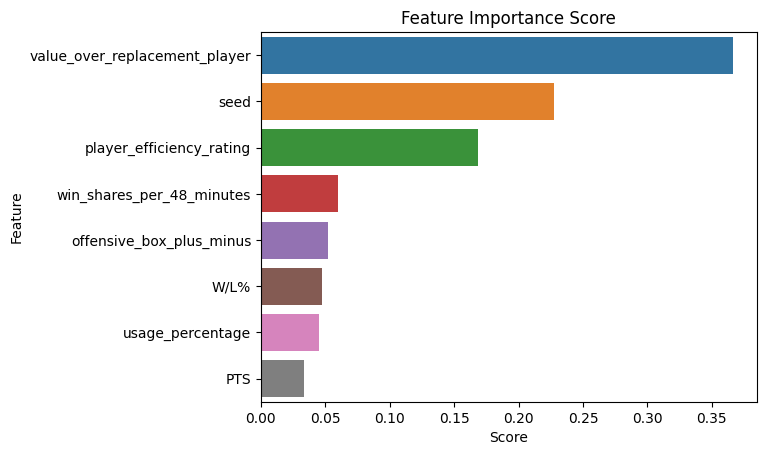

In [ ]:
#best xgb model
xgb_model, xgb_mvp_race_forecast = fit_forecast_model(regressor = XGBRegressor(
                                            n_estimators=16,
                                            max_depth=5,
                                            learning_rate=0.2745))

# 16 5, 0.2745



In [ ]:
show_highlighted_df(df=xgb_mvp_race_forecast)

In [ ]:
visualize_shap_values(model= xgb_model, mvp_race=xgb_mvp_race_forecast)

Rank: 1: Nikola Jokic


Rank: 2: Giannis Antetokounmpo


Rank: 3: Joel Embiid


### Model 2: Random Forest

In [ ]:
best_rf_model

RandomForestRegressor(max_depth=7, n_estimators=23, random_state=0)

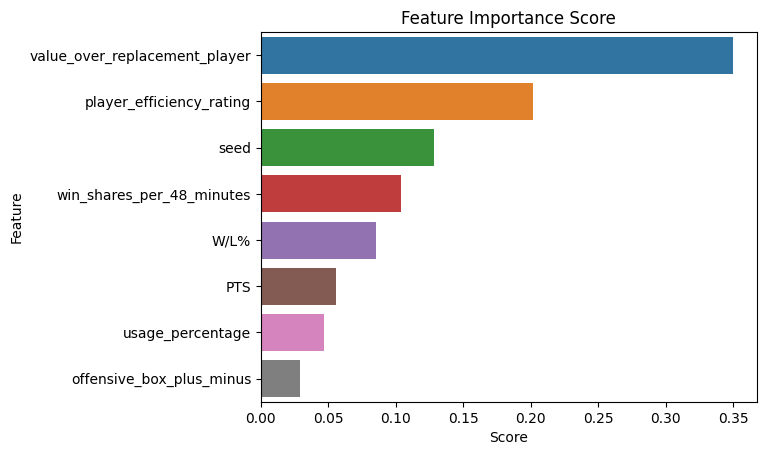

In [ ]:
#best random forest model
rf_model, rf_mvp_race_forecast = fit_forecast_model(regressor = RandomForestRegressor(n_estimators = 23, 
                                                  random_state = 0, 
                                                  max_depth=7, 
                                                  min_samples_leaf=1,
                                                  min_samples_split=2)
                  )

In [ ]:
show_highlighted_df(df=rf_mvp_race_forecast)

In [ ]:
visualize_shap_values(model = rf_model, mvp_race= rf_mvp_race_forecast)

Rank: 1: Nikola Jokic


Rank: 2: Joel Embiid


Rank: 3: Giannis Antetokounmpo


#### Model 3 LightGBM

In [ ]:
best_lgbm_model

LGBMRegressor(boosting_type='goss', learning_rate=0.15, max_depth=4,
              n_estimators=23, num_leaves=28, random_state=0)

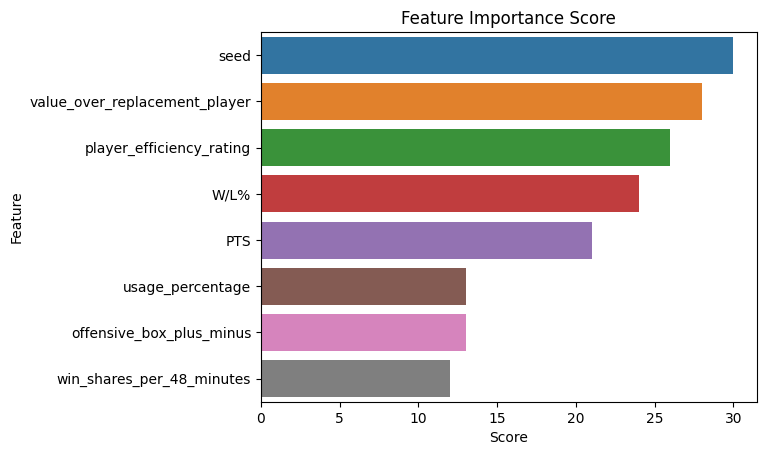

In [ ]:
#best LightGBM model
lgbm_model, lgbm_mvp_race_forecast = fit_forecast_model(
                                                regressor = LGBMRegressor(
                                                                    n_estimators=23,
                                                                    max_depth=4,
                                                                    learning_rate=0.15,
                                                                    num_leaves=28,
                                                                    boosting_type='goss',
                                                                    random_state = 0,
                                           ))

In [ ]:
show_highlighted_df(df=lgbm_mvp_race_forecast)

In [ ]:
visualize_shap_values(model = lgbm_model, mvp_race= lgbm_mvp_race_forecast)

Rank: 1: Nikola Jokic


Rank: 2: Giannis Antetokounmpo


Rank: 3: Joel Embiid


#### MVP Prediction Summary

In [ ]:
forecast_tables = [xgb_mvp_race_forecast, lgbm_mvp_race_forecast, rf_mvp_race_forecast]
model_names = ['XGBoost', 'LightGBM', 'Random Forest']

tables = []
for name, forecast_table in zip(model_names, forecast_tables):
    player_sub = forecast_table.head(3)[['Player']]
    player_sub['Rank'] = ['1st Place','2nd Place','3rd Place']
    player_sub2 = player_sub.T.reset_index(drop=True)
    player_sub2.columns = player_sub2.iloc[1]
    player_sub2.drop(player_sub2.tail(1).index,inplace=True)

    share_sub = forecast_table.head(5)[['Share Prediction']]
    share_sub['Rank'] = ['1st Place Share','2nd Place Share','3rd Place Share']
    
    share_sub2 = share_sub.T.reset_index(drop=True)
    share_sub2.columns = share_sub2.iloc[1]
    share_sub2.drop(share_sub2.tail(1).index,inplace=True)

    merged_df = pd.concat([player_sub2, share_sub2], axis=1).sort_index(axis=1)
    merged_df['Model'] = name
    tables.append(merged_df)
    
final_summary_table = pd.concat(tables)
# shift column 'Name' to first position
first_column = final_summary_table.pop('Model')
# first_column) function
final_summary_table.insert(0, 'Model', first_column)

In [ ]:
final_summary_table

1          Model     1st Place 1st Place Share              2nd Place  \
0        XGBoost  Nikola Jokic        0.873968  Giannis Antetokounmpo   
0       LightGBM  Nikola Jokic         0.76674  Giannis Antetokounmpo   
0  Random Forest  Nikola Jokic        0.813072            Joel Embiid   

1 2nd Place Share              3rd Place 3rd Place Share  
0        0.635524            Joel Embiid        0.442621  
0        0.405303            Joel Embiid        0.399246  
0         0.53134  Giannis Antetokounmpo        0.451252